In [185]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mnist import MNIST

# # def load_dataset():
# mndata = MNIST('./')
# mndata.gz = True

# X_train_raw, labels_train_raw = mndata.load_training()
# X_test_raw, labels_test_raw = mndata.load_testing()
# X_train_raw = np.array(X_train_raw)/255.0
# X_test_raw = np.array(X_train_raw)/255.0
    
idx2 = []
idx7 = []
#sort 
for i in range(len(labels_train_raw)):
    if(labels_train_raw[i] == 2):
        idx2.append(i)
    elif(labels_train_raw[i] == 7):
#         print(i)
        idx2.append(i)
x = X_train_raw[idx2+idx7]
y = np.array(np.array(labels_train_raw)[idx2+idx7],dtype='int')
y[y <3] = -1
y[y >3] = 1
print("original shape = ", X_train_raw.shape)
print("new shape = ", x.shape)
print("num labels = ", len(y))

idx2 = []
idx7 = []
#sort 
for i in range(len(labels_test_raw)):
    if(labels_test_raw[i] == 2):
        idx2.append(i)
    elif(labels_test_raw[i] == 7):
        idx7.append(i)
x_test = X_test_raw[idx2+idx7]
y_test = np.array(np.array(labels_test_raw)[idx2+idx7],dtype='int')
(unique, counts) = np.unique(y_test, return_counts=True)
print(unique)
print(counts)
y_test[y_test <3] = -1
y_test[y_test >3] = 1
print("original shape = ", X_test_raw.shape)
print("new shape = ", x_test.shape)
print("num labels = ", len(y_test))



original shape =  (60000, 784)
new shape =  (12223, 784)
num labels =  12223
[2 7]
[1032 1028]
original shape =  (60000, 784)
new shape =  (2060, 784)
num labels =  2060


In [186]:
(unique, counts) = np.unique(y_test, return_counts=True)
print(unique)
print(counts)

[-1  1]
[1032 1028]


In [184]:
def single_step(w, b, x, y, lam, eta):
    (n,d) = x.shape
    u = 1/(1+np.exp(-y*(b+x@w)))
    dw = np.sum((1-u)*(-x.T*y)/n, axis = 1) + 2*lam*w
    db = np.sum((1-u)*(-y))/n
    w_new = w - eta * dw
    b_new = b - eta * db
    return (w_new, b_new)

def find_J(w,b, x, y, lam):
    (n,d) = x.shape
#     print(1+np.exp(-y*(b+x@w)))
    return(np.sum(np.log(1+np.exp(-y*(b+x@w))))/n + lam * np.linalg.norm(w)**2)

def find_error(w, b, x, y):
    (n,d) = x.shape
    pred = np.sign(b+x@w)
    num_diff = np.sum((np.abs(pred - y)))/2
#     print(np.abs(pred - y))
    return num_diff/n

In [182]:
find_error(w, b, x_test, y_test)

[2. 2. 2. ... 0. 0. 0.]


0.5009708737864078

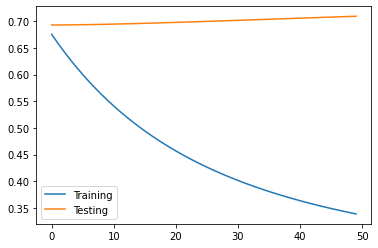

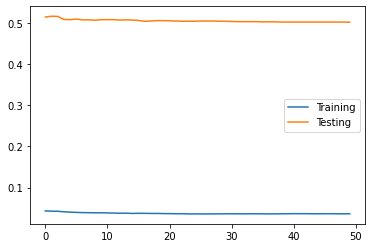

In [187]:
lam = 1e-1
eta = 0.01
(n,d) = x.shape
w = np.zeros(d)
b = 0
J_list = []
J_test_list = []
error_list = []
error_test_list = []

for i in range(50):
    w,b = single_step(w, b, x, y, lam, eta)
    J_list.append(find_J(w,b, x, y, lam))
    J_test_list.append(find_J(w,b, x_test, y_test, lam))
    error_list.append(find_error(w, b, x, y))
    error_test_list.append(find_error(w, b, x_test, y_test))
    
plt.plot(J_list, label = "Training")
plt.plot(J_test_list,  label = "Testing")
plt.legend()
plt.show()

plt.plot(error_list, label = "Training")
plt.plot(error_test_list,  label = "Testing")
plt.legend()
plt.show()

In [147]:
J_list

[0.6403540207893966,
 0.5946814310149459,
 0.5551588123536756,
 0.5209136609155621,
 0.49118170582430093,
 0.4653054651707337,
 0.4427261305955102,
 0.42297236239530434,
 0.4056482923245531,
 0.39042203911964635,
 0.3770153712511438,
 0.3651947415936372,
 0.35476369103619204,
 0.34555650596726123,
 0.33743297041166964,
 0.3302740464503253,
 0.3239783276840518,
 0.31845912921162867,
 0.31364209813295524,
 0.30946324812067233,
 0.3058673389139538,
 0.3028065363280765,
 0.30023930062254806,
 0.2981294610954068,
 0.29644544289732694,
 0.29515961860762024,
 0.2942477623742192,
 0.2936885886386867,
 0.2934633608508087,
 0.29355555829304825,
 0.29395059131815043,
 0.2946355570615318,
 0.2955990291097387,
 0.29683087575549455,
 0.29832210240280055,
 0.30006471444514077,
 0.3020515975601356,
 0.3042764128720636,
 0.30673350485107465,
 0.3094178201618557,
 0.31232483595872435,
 0.31545049635965944,
 0.31879115602748187,
 0.32234352994945054,
 0.3261046486426937,
 0.33007181812688247,
 0.33424258